<a href="https://colab.research.google.com/github/kanvesh/image_experiments/blob/master/image_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import cv2 
from PIL import Image as PILImage
from IPython.display import Image
import urllib.request
from keras.models import Model
from scipy.spatial.distance import cosine
from keras.applications.vgg16 import VGG16

# Setting up code to convert images to vectors

In [0]:
base_model = ResNet50(weights='imagenet')
#base_model.summary()


In [0]:
model_2048 = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [0]:
def get_vector(image_url, model):
  """Fetches a vector output for an image based on URL"""
  urllib.request.urlretrieve(image_url,'temp_func.jpg')
  img = image.load_img('temp_func.jpg', target_size=(224, 224))
  display(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  
  return features[0]

In [0]:
def get_vector_local(image_filepath, model):
  """Fetches a vector output for an image based on a local image location"""
  img = image.load_img(image_filepath, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  
  return features[0]

In [0]:
def cosine_similarity(a,b):
  """Fetches cosine similarity which is a measure of how close the image vectors are"""
  cosine_distance = 1-cosine(a,b)
  return "{:.1%}".format(cosine_distance)

# Testing if Cosine Similarity Works


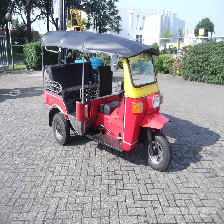

In [35]:
image_url = 'https://st.mascus.com/imagetilewm/product/f76b9d44/other-tuk-tuk-lk-10,6c5f91b1.jpg'
tuktuk1 = get_vector(image_url, model_2048)

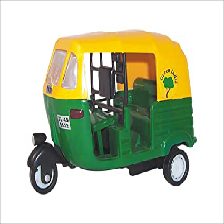

In [36]:
image_url = 'https://images-na.ssl-images-amazon.com/images/I/71s7Ug%2BO6qL._SX425_.jpg'
tuktuk2 = get_vector(image_url, model_2048)

In [37]:
%%timeit
cosine_similarity(tuktuk1,tuktuk2)

The slowest run took 5.72 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 48.2 µs per loop


In [38]:
cosine_similarity(a,b) # a and b are both

'58.4%'

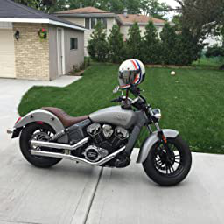

In [39]:
image_url = 'https://images-na.ssl-images-amazon.com/images/I/812+zMDwznL._CR204,0,1224,1224_UX256.jpg'
bike1 = get_vector(image_url, model_2048)

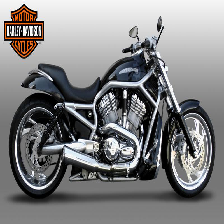

In [40]:
image_url = 'https://i.kinja-img.com/gawker-media/image/upload/s--KdZ9JgQO--/c_scale,f_auto,fl_progressive,q_80,w_800/eqesmoipnh3trliwwaef.jpg'
bike2 = get_vector(image_url, model_2048)

In [41]:
cosine_similarity(bike1,bike2)

'67.1%'

In [42]:
cosine_similarity(tuktuk1,bike2)

'46.6%'

## Cosine similarity seems to understand which images are similar and which are different, but the difference is not day and light


# What is the trade off with length of vectors?

In [0]:
base_vgg = VGG16(weights='imagenet')

In [0]:
#base_vgg.summary()

In [0]:

vgg_4096 = Model(inputs=base_vgg.input, outputs=base_vgg.get_layer('fc2').output)
vgg_25088 = Model(inputs=base_vgg.input, outputs=base_vgg.get_layer('flatten').output)



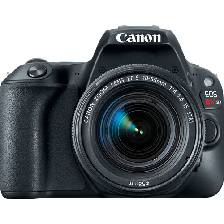

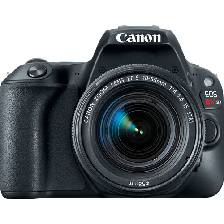

In [47]:
image_url = 'https://natcam-production.s3.amazonaws.com/product-103090806-images/103090806_1.jpg'
b= (get_vector(image_url,vgg_4096))
b1 = get_vector(image_url,vgg_25088)


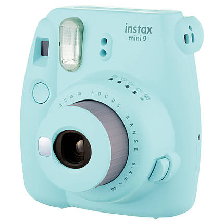

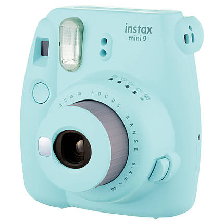

In [49]:
image_url = 'https://www.fotoaparatas.lt/images/eshop/09211112433.jpeg'
c= (get_vector(image_url,vgg_4096))
c1 = get_vector(image_url,vgg_25088)

In [63]:
print(cosine_similarity(b,c))
print(cosine_similarity(b1,c1))

28.4%
22.7%


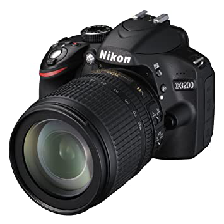

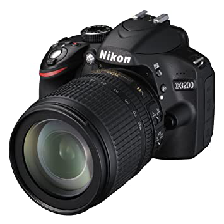

In [57]:
image_url = 'https://images-na.ssl-images-amazon.com/images/I/91qomZQwY4L._SX355_.jpg'
d= (get_vector(image_url,vgg_4096))
d1 = get_vector(image_url,vgg_25088)

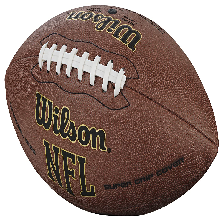

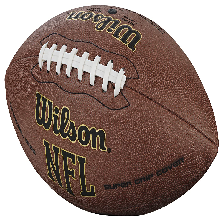

In [60]:
image_url = 'https://images-na.ssl-images-amazon.com/images/I/91Wzqo-BRSL._SL1500_.jpg'
e= (get_vector(image_url,vgg_4096))
e1 = get_vector(image_url,vgg_25088)


In [62]:
print(cosine_similarity(c,e))
print(cosine_similarity(c1,e1))


21.4%
14.8%


In [0]:
# Looks like the longer vector is able to distinguish dissimilarity better. 

In [65]:
!pip install annoy

In [0]:
resnet = model_2048

# Downloaded images of paris and seeing if the algo can match similar images

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [130]:
os.chdir('/content/drive/My Drive/paris - resized')
index_array = []
vector_array = []
counter=0
for filename in os.listdir():
  try:
    index_array.append(filename.split('.')[0])
    vector_array.append(get_vector_local(filename, resnet))
    counter=counter+1
  except:
    pass
  if counter%100==0:
    print(counter)
  
  if counter%500==0:
    print(counter)
    break


100
200
300
400
500
500


In [131]:
len(vector_array[0])


2048

In [132]:
!pip install annoy

# Building an index with all the image vectors using Annoy

In [133]:
!pwd
from annoy import AnnoyIndex
import random
import os
os.chdir('/content/drive/My Drive/paris - resized')
f = 2048
t = AnnoyIndex(f)  # Length of item vector that will be indexed
for i in range(len(vector_array)):
    t.add_item(i, vector_array[i])

t.build(10) # 10 trees
t.save('paris.ann')

# ...

g = AnnoyIndex(f)
g.load('paris.ann') # super fast, will just mmap the file
print(g.get_nns_by_item(0, 10)) # will find the 1000 nearest neighbors
os.chdir('/content/')

/content/drive/My Drive/paris - resized
[0, 261, 22, 270, 285, 47, 221, 196, 38, 252]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  app.launch_new_instance()


In [0]:
os.chdir('/content/drive/My Drive/paris - resized/')

In [135]:
!mkdir test_results2

mkdir: cannot create directory ‘test_results2’: File exists


In [136]:
len(vector_array)

500

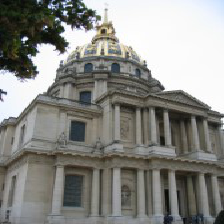

In [137]:
img = image.load_img(index_array[91]+'.jpg', target_size=(224, 224))
display(img)

In [0]:
def get_best_matches(input_index=0, ann_file='paris.ann', n_neighbors=5):
    matches= g.get_nns_by_item(input_index, n_neighbors+1)
    for i in range(len(matches)):
      if i==0:
        print('\n\nInput Image:')
      elif i==1:
        print('---------------------------------------------------------')
        print('\nBest Matches')
      img = image.load_img('/content/drive/My Drive/paris - resized/'+index_array[matches[i]]+'.jpg', target_size=(224, 224))
      display(img)
      img.save('test_results2/'+index_array[matches[i]]+'.jpg')
    
  

In [0]:
matches= g.get_nns_by_item(0, 4)
img = image.load_img(index_array[matches[0]]+'.jpg', target_size=(224, 224))
#dir(img)
#img.save('test_results/'+index_array[matches[0]]+'.jpg')

In [0]:
from numpy.random import randint

# Fetching best matches for a set of random images

# AMAZING RESULTS INDEED (Only indexed 500 paris images)

---------------------------------------------------------


Input Image:


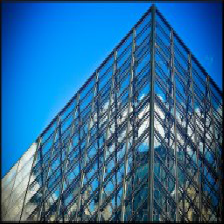

---------------------------------------------------------

Best Matches


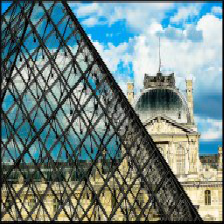

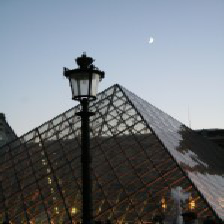

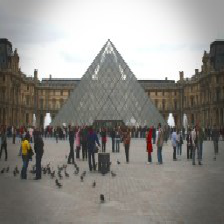

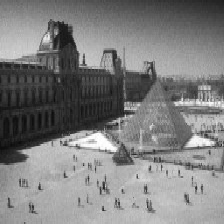

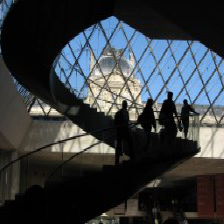

---------------------------------------------------------
---------------------------------------------------------


Input Image:


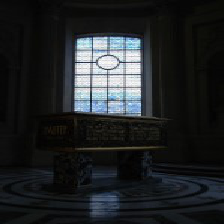

---------------------------------------------------------

Best Matches


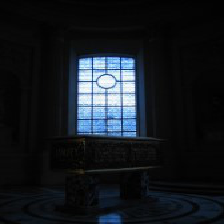

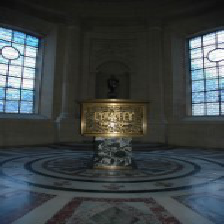

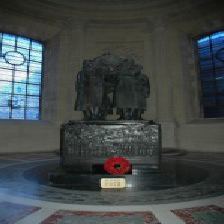

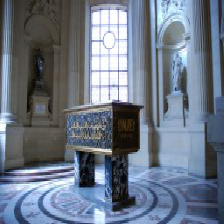

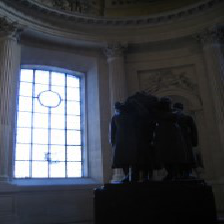

---------------------------------------------------------
---------------------------------------------------------


Input Image:


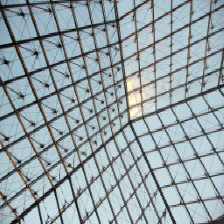

---------------------------------------------------------

Best Matches


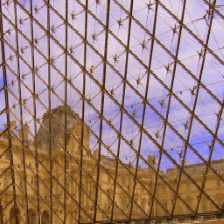

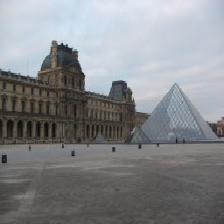

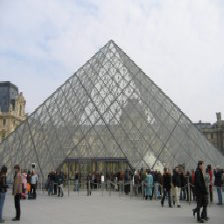

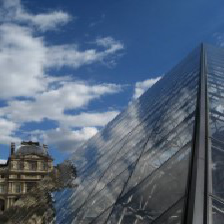

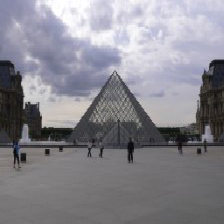

---------------------------------------------------------
---------------------------------------------------------


Input Image:


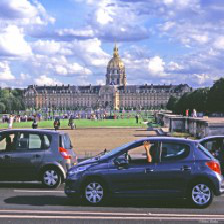

---------------------------------------------------------

Best Matches


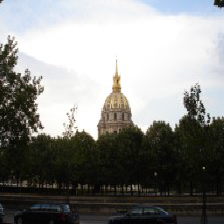

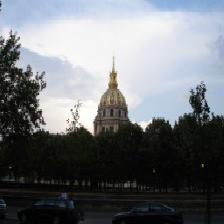

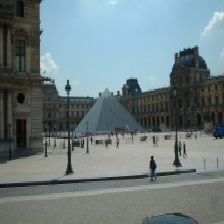

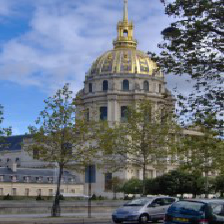

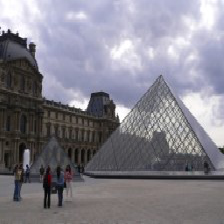

---------------------------------------------------------
---------------------------------------------------------


Input Image:


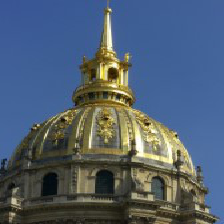

---------------------------------------------------------

Best Matches


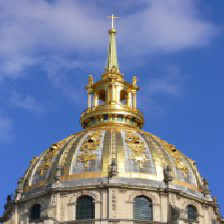

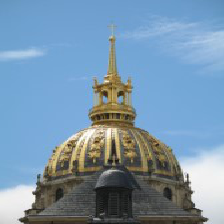

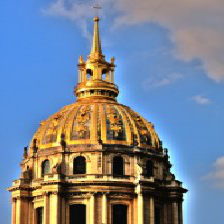

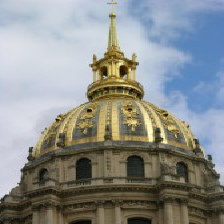

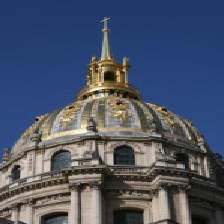

---------------------------------------------------------
---------------------------------------------------------


Input Image:


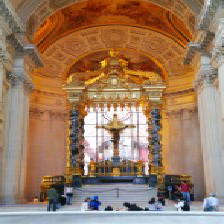

---------------------------------------------------------

Best Matches


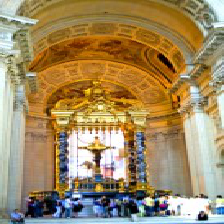

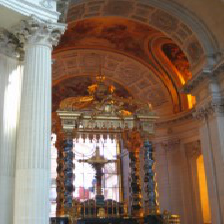

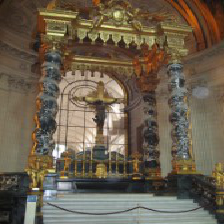

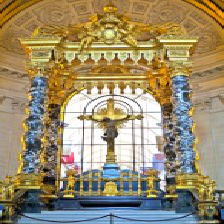

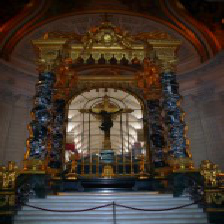

---------------------------------------------------------
---------------------------------------------------------


Input Image:


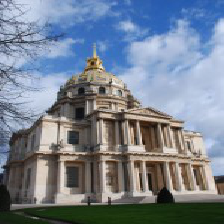

---------------------------------------------------------

Best Matches


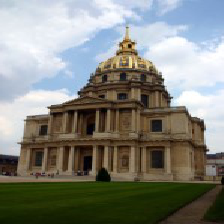

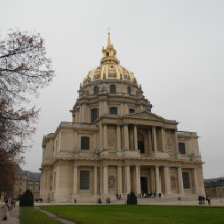

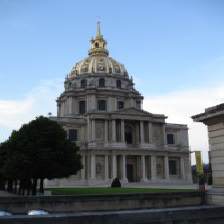

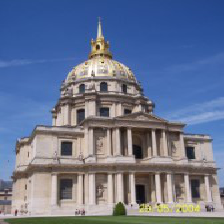

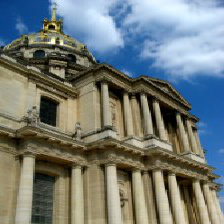

---------------------------------------------------------
---------------------------------------------------------


Input Image:


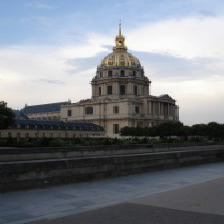

---------------------------------------------------------

Best Matches


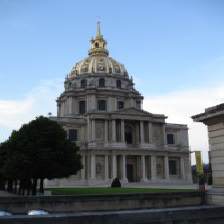

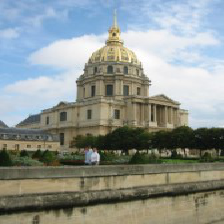

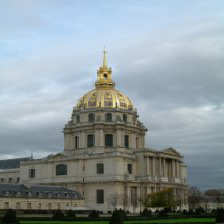

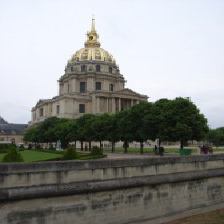

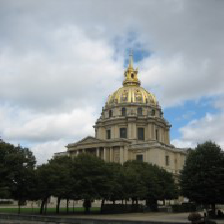

---------------------------------------------------------
---------------------------------------------------------


Input Image:


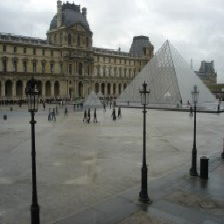

---------------------------------------------------------

Best Matches


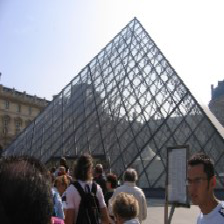

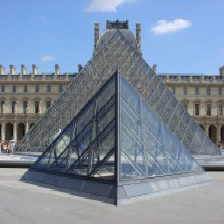

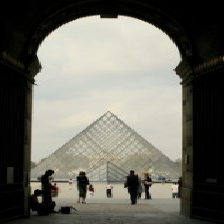

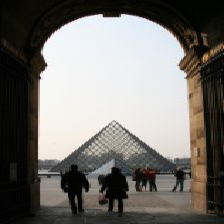

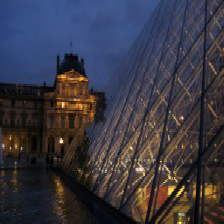

---------------------------------------------------------
---------------------------------------------------------


Input Image:


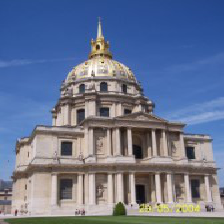

---------------------------------------------------------

Best Matches


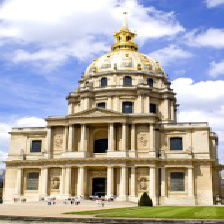

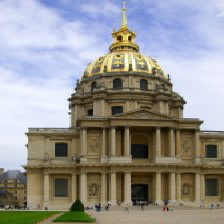

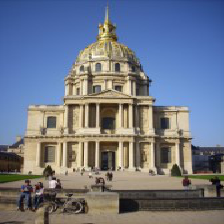

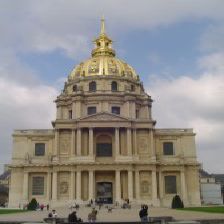

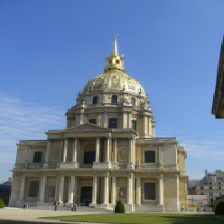

---------------------------------------------------------


In [145]:
for i in range(10):
  print('---------------------------------------------------------')
  get_best_matches(randint(len(vector_array)))
  print('---------------------------------------------------------')